In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
players<-read.csv("https://raw.githubusercontent.com/laurentang3/dsci-100-project-009-45/refs/heads/main/players.csv")
players
colnames(players)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


[1] "experience"   "subscribe"    "hashedEmail"  "played_hours" "name"        
[6] "gender"       "Age"

In [3]:
# compute the mean value for each quantitative variable
player_means <- players |>
    summarize(played_hours = mean(played_hours, na.rm=TRUE),
             Age = mean(Age, na.rm=TRUE))
player_means

played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


In [4]:
# Total players for experience level, subscription status and gender

# Experience level
experience_counts <- players |>
    group_by(experience) |>
    summarize(count=n())
experience_counts

# Subscription Status
# renaming the variables within the subscribe column
subscribe_mutated <- mutate(players, subscribe = as_factor(subscribe)) |>
    mutate(subscribe = fct_recode(subscribe, "Yes" = "TRUE", "No" = "FALSE"))

# Totalling the number of players based on subscription
subscriber_counts <- subscribe_mutated |>
    group_by(subscribe) |>
    summarize(count=n())
subscriber_counts

# Gender
gender_counts <- players |>
    group_by(gender) |>
    summarize(count=n())
gender_counts

experience,count
<chr>,<int>
Amateur,63
Beginner,35
Pro,14
Regular,36
Veteran,48


subscribe,count
<fct>,<int>
No,52
Yes,144


gender,count
<chr>,<int>
Agender,2
Female,37
Male,124
Non-binary,15
Other,1
Prefer not to say,11
Two-Spirited,6


In [5]:
# Min, max, and mean number of players' age
age_summary <- players |>
    summarize(age_min = min(Age, na.rm=TRUE),
             age_max = max(Age, na.rm=TRUE),
             age_mean = mean(Age, na.rm=TRUE))
age_summary

# Min, max, and mean number of hours played with counts
played_hours_summary <- players |>
    summarize(played_hours_min = min(played_hours, na.rm=TRUE),
             played_hours_max = max(played_hours, na.rm=TRUE),
             played_hours_mean = mean(played_hours, na.rm=TRUE))
played_hours_summary

age_min,age_max,age_mean
<int>,<int>,<dbl>
9,58,21.13918


played_hours_min,played_hours_max,played_hours_mean
<dbl>,<dbl>,<dbl>
0,223.1,5.845918


Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


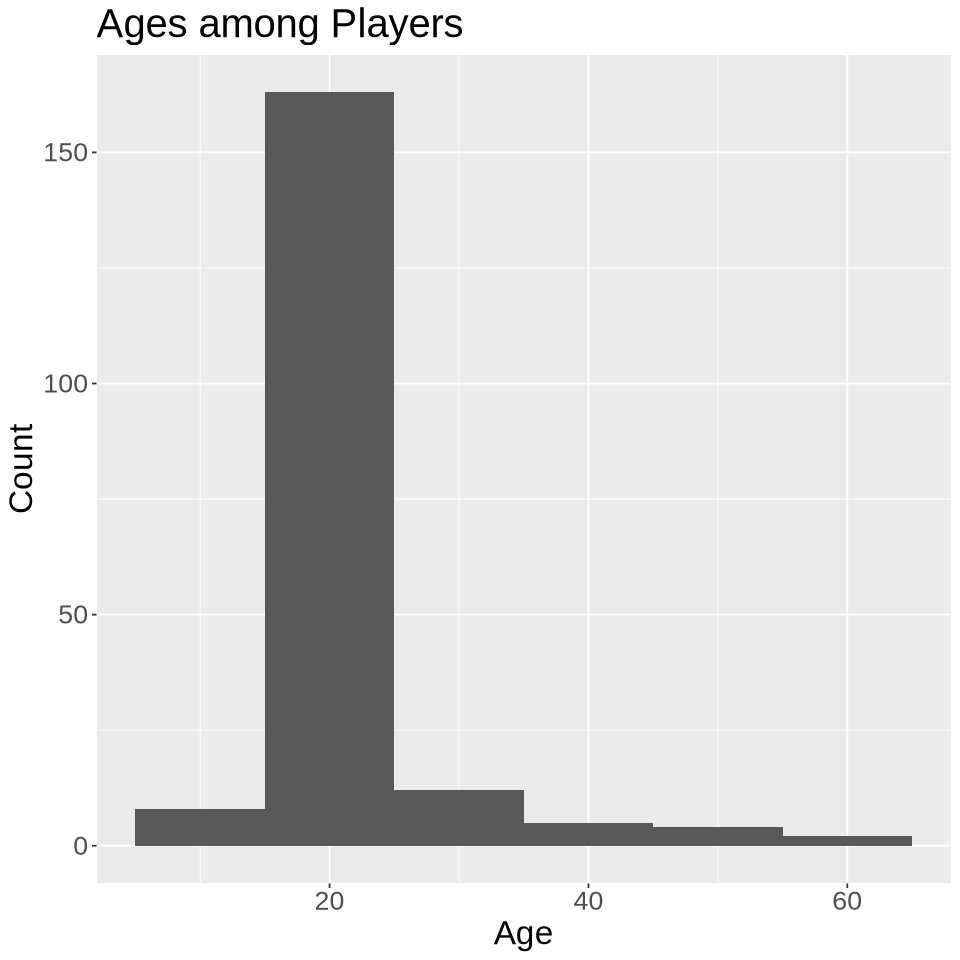

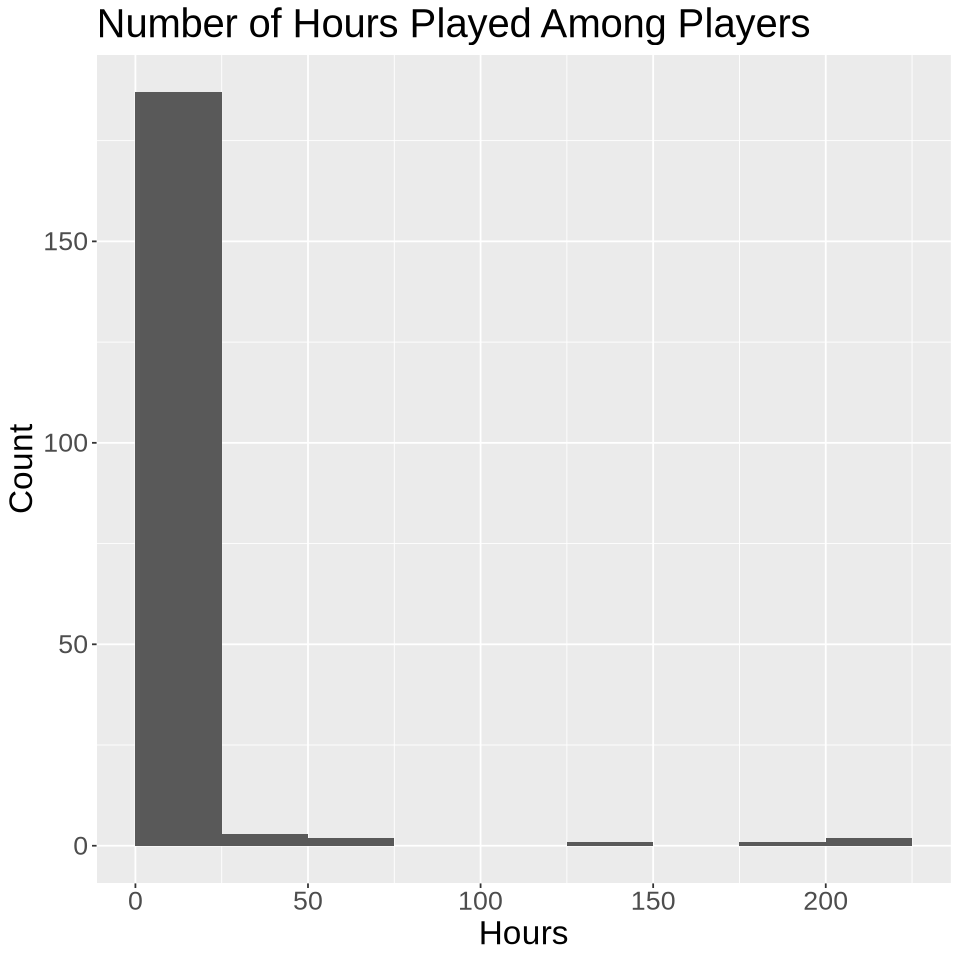

In [6]:
options(repr.plot.width = 8, repr.plot.height = 8)
# histogram for distribution of ages among players
age_counts <- ggplot(players, aes(x=Age)) +
    geom_histogram(binwidth=10) +
    labs(x="Age", y="Count", title="Ages among Players") +
    theme(text=element_text(size=20))
age_counts

# histogram for distribution of hours played among players
played_hours_counts <- ggplot(players, aes(x=played_hours)) +
    geom_histogram(boundary = 0, binwidth=25) +
    labs(x="Hours", y="Count", title="Number of Hours Played Among Players") +
    theme(text=element_text(size=20))
played_hours_counts

In [7]:
sessions<-read.csv("https://raw.githubusercontent.com/laurentang3/dsci-100-project-009-45/refs/heads/main/sessions.csv")
sessions
colnames(sessions)

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


[1] "hashedEmail"         "start_time"          "end_time"           
[4] "original_start_time" "original_end_time"

In [8]:
# computing the duration of play for each session
sessions_mutated <- sessions |>
  mutate(start_time = ymd_hms(start_time),
    end_time = ymd_hms(end_time)) |>
    mutate(playing_duration = as.numeric(difftime(end_time, start_time, units = "secs")))
sessions_mutated

hashedEmail,start_time,end_time,original_start_time,original_end_time,playing_duration
<chr>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2030-06-21 00:18:12,2030-06-21 00:18:24,1.71977e+12,1.71977e+12,12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2017-06-21 00:23:33,2017-06-21 00:23:46,1.71867e+12,1.71867e+12,13
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2025-07-21 00:17:34,2025-07-21 00:17:57,1.72193e+12,1.72193e+12,23
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2025-07-21 00:03:22,2025-07-21 00:03:58,1.72188e+12,1.72188e+12,36
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2025-05-21 00:16:01,2025-05-21 00:16:12,1.71665e+12,1.71665e+12,11
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2023-06-21 00:15:08,2023-06-21 00:17:10,1.71916e+12,1.71916e+12,122
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2015-04-21 00:07:12,2015-04-21 00:07:21,1.71317e+12,1.71317e+12,9
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,2021-09-21 00:02:13,2021-09-21 00:02:30,1.72688e+12,1.72689e+12,17
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,2021-06-21 00:02:31,2021-06-21 00:02:49,1.71894e+12,1.71894e+12,18


In [9]:
# finding the min, max and mean playing duration

# filter out invalid sessions (mistake in years)
sessions_corrected <- sessions_mutated |>
    filter(end_time >= start_time)

playing_duration_summary <- sessions_corrected |>
  summarise(playing_duration_min  = min(playing_duration, na.rm = TRUE), # represented in seconds,
    playing_duration_max  = max(playing_duration, na.rm = TRUE),
    playing_duration_mean = mean(playing_duration, na.rm = TRUE)) |>
    mutate(playing_duration_max = playing_duration_max / 86400, # represented in days
          playing_duration_mean = playing_duration_mean / 86400) # represented in days
playing_duration_summary

playing_duration_min,playing_duration_max,playing_duration_mean
<dbl>,<dbl>,<dbl>
3,365.9863,21.24014


The minimum playing duration is 3 seconds.
The maximum playing duration is ~366 days.
The average playing duration is ~21 days.